In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from PIL import Image

In [2]:
from utils import rgb2binary

In [3]:
map1 = Image.open('init_maps/map_1.jpg')

map1 = rgb2binary(np.array(map1))

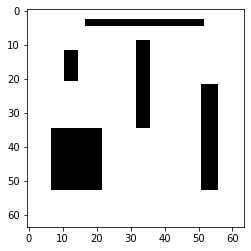

In [4]:
plt.imshow(map1, cmap='gray')

In [5]:
from utils import MapAugmentator, TaskGenerator

In [6]:
map_augmentator = MapAugmentator(map1)
map_augmentator.set_parameters(h_shift=4, w_shift=4, step=1, t_prob=0.5)

In [7]:
maps = map_augmentator.generate(n_maps=10)

In [8]:
from utils import make_grid

In [9]:
grid = make_grid(maps, n_maps=10, margin=2)

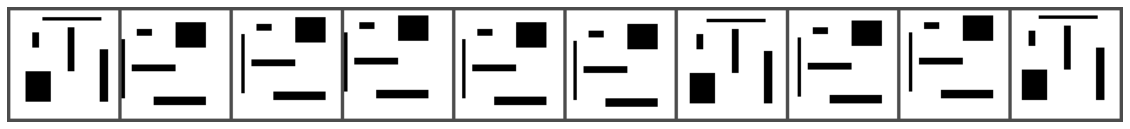

In [10]:
plt.figure(figsize=(20, 4))
plt.imshow(grid, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
task_generator=TaskGenerator(map1)
task_generator.set_parameters(min_length=20)
tasks, task_maps = task_generator.generate(n_tasks=10)
pd.DataFrame.from_dict(tasks)

,istart,jstart,igoal,jgoal,euclid
0,59,43,4,0,69.814039
1,4,14,52,3,49.244289
2,31,4,56,40,43.829214
3,40,38,53,1,39.217343
4,18,8,44,26,31.622777
5,1,17,29,45,39.597980
6,55,21,14,46,48.020829
7,50,42,3,16,53.712196
8,44,32,28,18,21.260292
9,36,60,0,58,36.055513


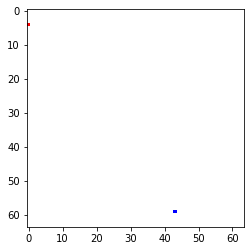

In [12]:
plt.imshow(task_maps[0])

In [13]:
from utils import save_maps_and_tasks

In [14]:
fnames = ['map_'+str(i) for i in range(1, 11)]

h_shift=6
w_shift=6
step=1
t_prob=0.5

n_maps=10
n_tasks=100
min_length=30

0it [00:00, ?it/s]

map_1


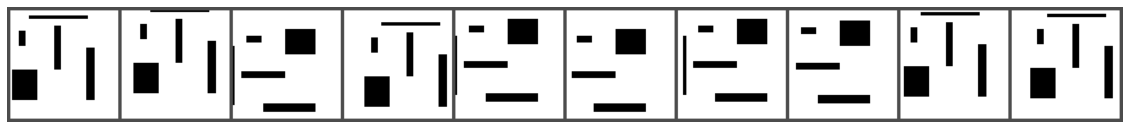

map_2


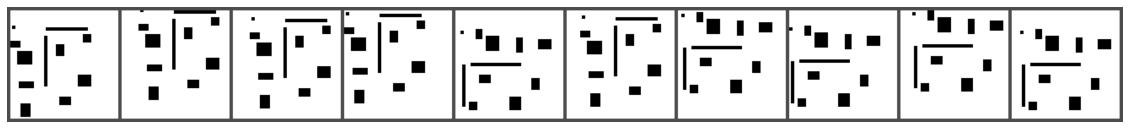

map_3


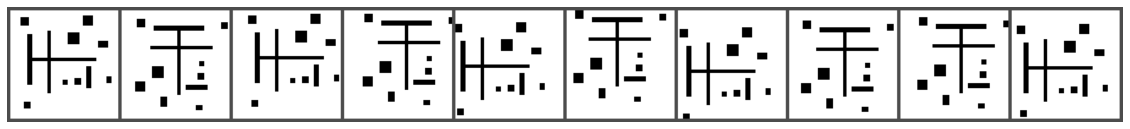

map_4


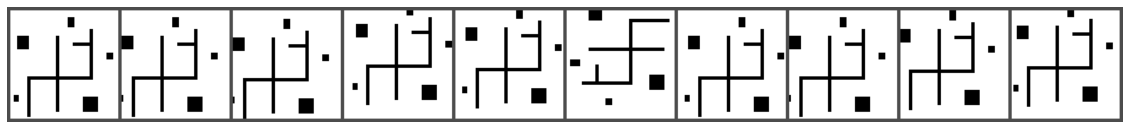

map_5


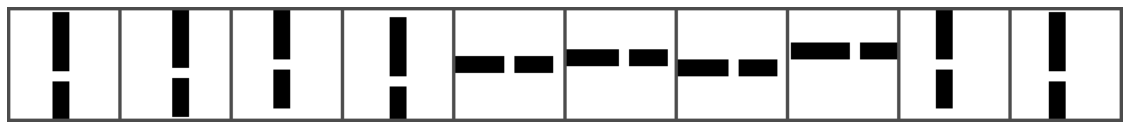

map_6


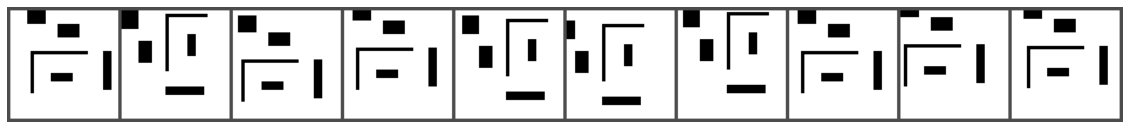

map_7


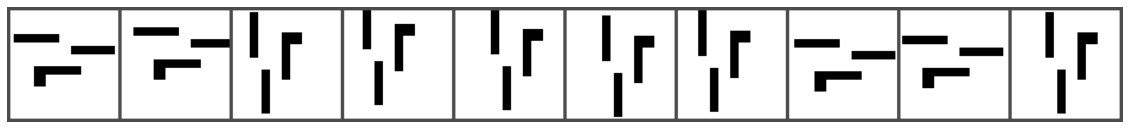

map_8


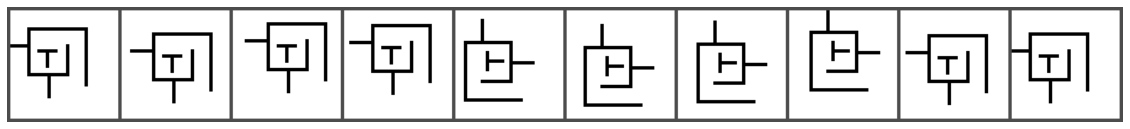

map_9


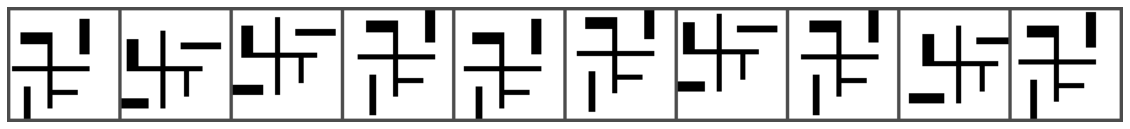

map_10


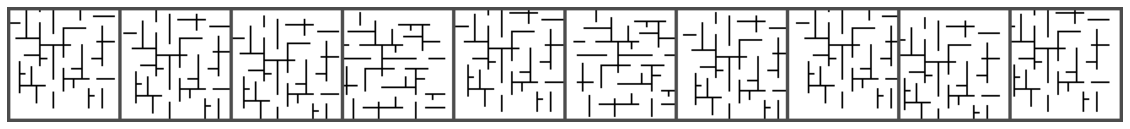

In [15]:
for i, fname in tqdm(enumerate(fnames)):
    print(fname)
    init_map = Image.open(f'init_maps/{fname}.jpg')
    init_map = rgb2binary(np.array(init_map))
    
    map_augmentator = MapAugmentator(init_map)
    
    map_augmentator.set_parameters(h_shift=h_shift,
                                   w_shift=w_shift,
                                   step=step,
                                   t_prob=t_prob)
    
    maps = map_augmentator.generate(n_maps=n_maps)
    tasks=[]
    task_maps=[]
    for m in maps:
        task_generator=TaskGenerator(m)
        task_generator.set_parameters(min_length=min_length)
        t, tm = task_generator.generate(n_tasks=n_tasks)
        tasks.append(t)
        task_maps.append(tm)
        
    grid = make_grid(maps, n_maps=10, margin=2)
    plt.figure(figsize=(20, 4))
    plt.imshow(grid, cmap='gray')
    plt.axis('off')
    plt.show()
    save_maps_and_tasks(maps, tasks, task_maps, m_path='maps/', t_path='tasks/',  istart=i*n_maps)

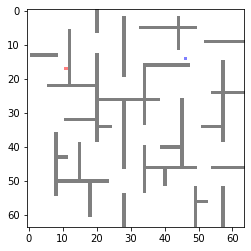

In [16]:
plt.imshow((np.expand_dims(maps[1], -1)+task_maps[1][2])/2)